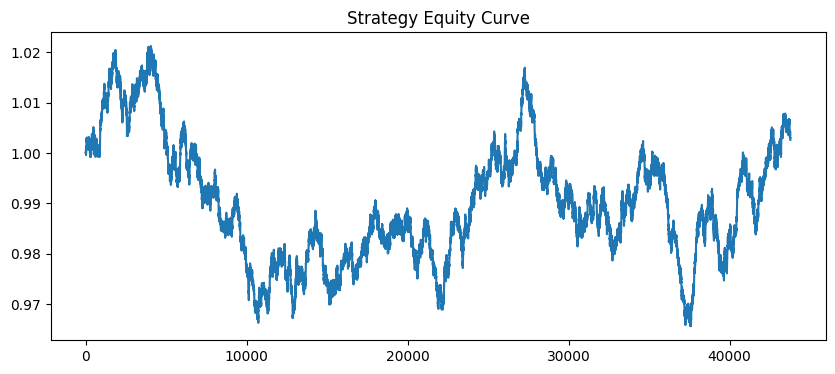

Strategy results & plot saved ✅


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

%matplotlib inline
os.makedirs("../results", exist_ok=True)

df = pd.read_csv("../data/nifty_features_5min.csv")

df["signal"] = 0
df.loc[df["ema_5"] > df["ema_15"], "signal"] = 1
df.loc[df["ema_5"] < df["ema_15"], "signal"] = -1

df["strategy_return"] = df["signal"].shift(1) * df["returns"]
df["cum_return"] = (1 + df["strategy_return"]).cumprod()

df.to_csv("../results/strategy_output.csv", index=False)

plt.figure(figsize=(10,4))
plt.plot(df["cum_return"])
plt.title("Strategy Equity Curve")
plt.savefig("../plots/equity_curve.png", dpi=300)
plt.show()

print("Strategy results & plot saved ✅")
